In [1]:
import os
from ast import literal_eval
import pandas as pd
import numpy as np
from sklearn.metrics import ndcg_score
from tqdm import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()

In [2]:
df_genres = pd.read_csv('data/id_genres_mmsr.tsv', sep='\t')

data = {'bert': 'data/id_lyrics_bert_mmsr.tsv',
        'tfidf': 'data/id_lyrics_tf-idf_mmsr.tsv',
        'word2vec': 'data/id_lyrics_word2vec_mmsr.tsv'}

now = 'word2vec' #'tfidf' #'bert'

df = pd.read_csv(data[now], sep='\t')

In [3]:
df_genres.head()

,id,genre
0,0009fFIM1eYThaPg,['pop']
1,0010xmHR6UICBOYT,"['beats', 'underground hip hop', 'lo fi']"
2,002Jyd0vN4HyCpqL,"['hard rock', 'classic rock', 'rock', 'progres..."
3,006TYKNjNxWjfKjy,"['power metal', 'symphonic metal', 'symphonic ..."
4,007LIJOPQ4Sb98qV,"['post punk', 'new wave', 'dream pop', 'altern..."


In [4]:
df.shape

(68641, 301)

In [5]:
df.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,0LiOzxBZ1aPLlFsK,0.031109,0.018026,0.022785,0.028802,-0.026084,-0.006278,0.030599,-0.041043,0.036703,...,-0.025845,0.010468,-0.047819,0.005620,-0.025106,-0.017939,-0.009981,-0.027846,0.021100,-0.020994
1,mxzw6q1VfWMdd9ro,0.013538,0.026949,0.006707,0.026687,-0.028433,-0.010083,0.022415,-0.040218,0.033329,...,-0.009777,0.020072,-0.050425,0.011942,-0.015132,-0.016525,0.016312,-0.021790,0.016149,-0.010693
2,F4vPrkSvYHwgexdS,0.019174,0.025422,0.010472,0.029765,-0.015188,0.007465,0.025536,-0.030486,0.026359,...,-0.025898,0.003252,-0.032156,0.002617,-0.017799,-0.017956,-0.012303,-0.011325,0.008986,-0.021229
3,cSJ3rv6DiHqyBJot,0.020385,0.014784,0.007314,0.024862,-0.060034,-0.007292,0.010608,-0.015649,0.027011,...,0.000165,0.025670,-0.046199,0.007238,-0.017479,-0.027334,0.024825,-0.026100,-0.015547,-0.015416
4,0hi04T4inOYGP0pz,0.003372,0.010353,0.020657,0.054301,-0.032918,-0.014128,0.011995,-0.036129,0.011246,...,-0.006355,0.032609,-0.033684,-0.005730,-0.025583,-0.026271,0.025765,-0.039988,-0.002181,-0.018827


In [6]:
n = 68641 # Number of rows to pick
top_n = 100 # Top n recommendations

In [7]:
df_embeddings = df[df.columns[1:]].values
df_embeddings_mag = np.linalg.norm(df_embeddings, axis=1)

similar_ids = []

for i in tqdm(range(n)):
    v1 = df_embeddings[i].reshape(-1, 1)
    v1_mag = df_embeddings_mag[i]

    dot_product = (df_embeddings @ v1).flatten()
    similarities = dot_product / (v1_mag * df_embeddings_mag)
    similarities = similarities[np.isnan(similarities) == False]
    index_sort = np.argsort(similarities)[::-1]
    sorted_ids = df['id'].iloc[index_sort[:top_n]]
    joined_ids = '||'.join(sorted_ids)
    similar_ids.append(joined_ids)

  0%|                                                                                                                                                                                                                      | 0/68641 [00:00<?, ?it/s]/var/folders/ds/224yqw6n1x1dv3s622c8dpwc0000gn/T/ipykernel_5486/3915175523.py:11: RuntimeWarning: invalid value encountered in true_divide
  similarities = dot_product / (v1_mag * df_embeddings_mag)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 68641/68641 [14:09<00:00, 80.81it/s]


In [8]:
df_n = df.head(n)

df_n['similar_ids'] = similar_ids

/var/folders/ds/224yqw6n1x1dv3s622c8dpwc0000gn/T/ipykernel_5486/261043778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['similar_ids'] = similar_ids


In [9]:
df_n[['id', 'similar_ids']].head()

,id,similar_ids
0,0LiOzxBZ1aPLlFsK,0LiOzxBZ1aPLlFsK||VPbu0qRW1O5bSVwh||f8jDyMjHrq...
1,mxzw6q1VfWMdd9ro,mxzw6q1VfWMdd9ro||qGQpRpIBvvEEA6dP||9WB202mqTA...
2,F4vPrkSvYHwgexdS,F4vPrkSvYHwgexdS||H6x6AbA1qv5rLpFI||cOg8MuwGJJ...
3,cSJ3rv6DiHqyBJot,cSJ3rv6DiHqyBJot||MKm6La8dhLPXylFn||oULCJUmsDq...
4,0hi04T4inOYGP0pz,0hi04T4inOYGP0pz||UN5IORBOghO65pM6||qV6PNwSOpo...


In [10]:
df_n[['id', 'similar_ids']].to_csv('df_n.csv', index=False) # save this ##############

In [11]:
df_n[['id', 'similar_ids']].head()

,id,similar_ids
0,0LiOzxBZ1aPLlFsK,0LiOzxBZ1aPLlFsK||VPbu0qRW1O5bSVwh||f8jDyMjHrq...
1,mxzw6q1VfWMdd9ro,mxzw6q1VfWMdd9ro||qGQpRpIBvvEEA6dP||9WB202mqTA...
2,F4vPrkSvYHwgexdS,F4vPrkSvYHwgexdS||H6x6AbA1qv5rLpFI||cOg8MuwGJJ...
3,cSJ3rv6DiHqyBJot,cSJ3rv6DiHqyBJot||MKm6La8dhLPXylFn||oULCJUmsDq...
4,0hi04T4inOYGP0pz,0hi04T4inOYGP0pz||UN5IORBOghO65pM6||qV6PNwSOpo...


In [12]:
id2genre = dict(zip(df_genres['id'], df_genres['genre']))

In [13]:
df_genres.head()

,id,genre
0,0009fFIM1eYThaPg,['pop']
1,0010xmHR6UICBOYT,"['beats', 'underground hip hop', 'lo fi']"
2,002Jyd0vN4HyCpqL,"['hard rock', 'classic rock', 'rock', 'progres..."
3,006TYKNjNxWjfKjy,"['power metal', 'symphonic metal', 'symphonic ..."
4,007LIJOPQ4Sb98qV,"['post punk', 'new wave', 'dream pop', 'altern..."


In [14]:
df_n_id_simid = df_n[['id', 'similar_ids']]
id2simid = tuple(zip(df_n_id_simid['id'], df_n_id_simid['similar_ids']))

In [41]:
def get_binary_scores(id, similar_ids, id2genre):
    similar_ids_list = similar_ids.split('||')
    binary_result = []
    for similar_id in similar_ids_list:
        genres1 = literal_eval(id2genre[id])
        if similar_id != '':
            genres2 = literal_eval(id2genre[similar_id])
            intersect = [x for x in genres1 if x in genres2]
            if len(intersect) == 0:
                 binary_result.append(0)
            else:
                 binary_result.append(1)
    return binary_result

In [42]:
len(df_n_id_simid)

68641

In [43]:
binary_similarity = []
for row in tqdm(id2simid):
    # print(row)
    result = get_binary_scores(*row, id2genre)
    if result != "''":
        binary_similarity.append([row[0], row[1].split('||'), result])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 68641/68641 [02:13<00:00, 513.04it/s]


In [48]:
id_precision = []
# id_recall = []
for row in binary_similarity:
    values = row[2]
    TP = sum(values)
    FP = len(values) - TP
    if (TP+FP) != 0:
        precision = TP / (TP + FP)
        # recall = TP / len(values)
    else: 
        precision = 0
    id_precision.append([row[0], precision])
        # id_recall.append([row[0], recall])

precision_values = [i[1] for i in id_precision]
precision = np.mean(precision_values)
# recall = np.mean([i[1] for i in id_recall])

print('Precision is:', precision)
# print('Recall is:', recall)

first_occurences = []
for row in binary_similarity:
    try:
        first_occ = row[2].index(1)+1
    except ValueError:
        continue
    else:
        first_occurences.append(first_occ)

MRR = sum([1/i for i in first_occurences]) / len(binary_similarity)
print('MRR is:', MRR)

y_true = []
y_pred = []
for row in binary_similarity:
    values = row[2]
    y_pred.append(values)
    sorted_values = sorted(values)
    reversed_sorted_values = list(reversed(sorted_values))
    y_true.append(reversed_sorted_values)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

print('NDCG is:', ndcg_score(y_true, y_pred))

Precision is: 0.4865845485934063
MRR is: 0.8899225800714194


/var/folders/ds/224yqw6n1x1dv3s622c8dpwc0000gn/T/ipykernel_5486/3371091113.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_true = np.array(y_true)
/var/folders/ds/224yqw6n1x1dv3s622c8dpwc0000gn/T/ipykernel_5486/3371091113.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(y_pred)


ValueError: setting an array element with a sequence.

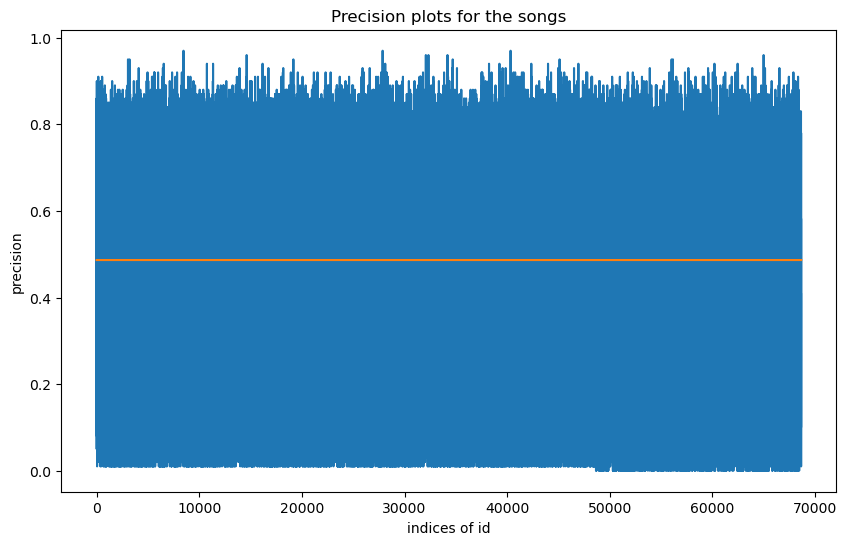

In [49]:
plt.figure(figsize=(10, 6))

plt.plot(range(len(id_precision)), precision_values)
plt.plot(range(len(id_precision)), [precision] * len(id_precision))
plt.title('Precision plots for the songs')
plt.xlabel('indices of id')
plt.ylabel('precision')
plt.show()

## Packaged function

In [50]:
## Packaged function

import pandas as pd
import numpy as np

# directory = 'data/task2/'

# data = {'bert': 'id_lyrics_bert_mmsr.tsv',
#         'tfidf': 'id_lyrics_tf-idf_mmsr.tsv',
#         'word2vec': 'id_lyrics_word2vec_mmsr.tsv'}

# now = 'bert'

FILE_TSV = data[now]

def get_similar_tracks(id, FILE_TSV, n):
    df = pd.read_csv(FILE_TSV, sep='\t')
    # # embeddings = df[df.columns[1:]].values

    # # emb = df[df['id'] == id]
    # # id_embedding = emb[emb.columns[1:]].values.T
    # # similarities = (embeddings @ id_embedding).ravel()
    # # sorted_indices = np.argsort(similarities)[::-1]
    # # indices = sorted_indices[:n+1]
    # # similar_ids = df['id'].iloc[indices]
    # # result = similar_ids.values.tolist()
    # # result.remove(id)
    # # return result

    df_embeddings = df[df.columns[1:]].values
    df_embeddings_mag = np.linalg.norm(df_embeddings, axis=1)

    emb = df[df['id'] == id]
    v1 = emb[emb.columns[1:]].values.T
    v1_mag = df_embeddings_mag[i]

    dot_product = (df_embeddings @ v1).flatten()
    similarities = dot_product / (v1_mag * df_embeddings_mag)
    similarities = similarities[np.isnan(similarities) == False]
    index_sort = np.argsort(similarities)[::-1]
    sorted_ids = df['id'].iloc[index_sort[:top_n]]
    return sorted_ids

# Test
id = '0009fFIM1eYThaPg'
similar_ids = get_similar_tracks(id, FILE_TSV, 100) # compare with top 100 
print(similar_ids)

4856     0009fFIM1eYThaPg
55120    SS6ZLl7rvUjUay4g
53915    7qetrkjjDXjyc28r
66276    fkfNSSQUlqtTmCpC
65478    RQuLFjlMmfY4YSHr
               ...       
24500    82Gi1fOzAAR0y0hu
66007    cWznCDq0WrIkq1kl
63834    INDWvz0mN8kSiuUR
45303    cvJCu5BQQxzGk2qh
65976    mCl2qosijE1w80Yy
Name: id, Length: 100, dtype: object


/var/folders/ds/224yqw6n1x1dv3s622c8dpwc0000gn/T/ipykernel_5486/1182247615.py:38: RuntimeWarning: invalid value encountered in true_divide
  similarities = dot_product / (v1_mag * df_embeddings_mag)
